In [2]:
import pandas as pd
import cobra
from cobra.io import read_sbml_model

# State the path to the file iJO1366.xml
ccle_fname = '../models/ga_models/Recon3D_LT15_trimed_corda_model_8_60_95.xml'

# Read the model
ccle_model = read_sbml_model(ccle_fname)

'' is not a valid SBML 'SId'.


Restricted license - for non-production use only - expires 2022-01-13


In [5]:
raw_fname = '../models/Recon3DModel_301_no_isoforms_gene_symbols_LT15_trimed.xml'
raw_model = read_sbml_model(raw_fname)

ctrl_fname = '../data/processed/experimental_cs_models/control_cs_model.xml'
ctrl_model = read_sbml_model(ctrl_fname)

t30_fname = '../data/processed/experimental_cs_models/30ug_cs_model.xml'
t30_model = read_sbml_model(t30_fname)

t60_fname = '../data/processed/experimental_cs_models/60ug_cs_model.xml'
t60_model = read_sbml_model(t60_fname)

t100_fname = '../data/processed/experimental_cs_models/100ug_cs_model.xml'
t100_model = read_sbml_model(t100_fname)

'' is not a valid SBML 'SId'.


In [6]:
ccle_model.solver = 'glpk'
raw_model.solver = 'glpk'
ctrl_model.solver = 'glpk'
t30_model.solver = 'glpk'
t60_model.solver = 'glpk'
t100_model.solver = 'glpk'

ccle_model.objective = 'biomass_reaction'
raw_model.objective = 'biomass_reaction'
ctrl_model.objective = 'biomass_reaction'
t30_model.objective = 'biomass_reaction'
t60_model.objective = 'biomass_reaction'
t100_model.objective = 'biomass_reaction'

In [46]:
ccle_sol = ccle_model.optimize()
raw_sol = raw_model.optimize()
ctrl_sol = ctrl_model.optimize()
t30_sol = t30_model.optimize()
t60_sol = t60_model.optimize()
t100_sol = t100_model.optimize()

In [50]:
idx = ccle_model.summary().to_frame().index

In [61]:
ccle_sol_df = ccle_sol.to_frame()
ccle_sol_df = ccle_sol_df[ccle_sol_df['fluxes'] != 0]
ccle_sol_df = ccle_sol_df.loc[ccle_sol_df.index.intersection(idx)]
ccle_sol_df = ccle_sol_df.rename(columns={'fluxes':'ccle'})
ccle_sol_df = ccle_sol_df.drop('reduced_costs', axis=1)

In [65]:
raw_sol_df = raw_sol.to_frame()
raw_sol_df = raw_sol_df[raw_sol_df['fluxes'] != 0]
raw_sol_df = raw_sol_df.loc[raw_sol_df.index.intersection(idx)]
raw_sol_df = raw_sol_df.rename(columns={'fluxes':'raw'})
raw_sol_df = raw_sol_df.drop('reduced_costs', axis=1)

In [66]:
ctrl_sol_df = ctrl_sol.to_frame()
ctrl_sol_df = ctrl_sol_df[ctrl_sol_df['fluxes'] != 0]
ctrl_sol_df = ctrl_sol_df.loc[ctrl_sol_df.index.intersection(idx)]
ctrl_sol_df = ctrl_sol_df.rename(columns={'fluxes':'ctrl'})
ctrl_sol_df = ctrl_sol_df.drop('reduced_costs', axis=1)

In [67]:
t30_sol_df = t30_sol.to_frame()
t30_sol_df = t30_sol_df[t30_sol_df['fluxes'] != 0]
t30_sol_df = t30_sol_df.loc[t30_sol_df.index.intersection(idx)]
t30_sol_df = t30_sol_df.rename(columns={'fluxes':'t30'})
t30_sol_df = t30_sol_df.drop('reduced_costs', axis=1)

In [68]:
t60_sol_df = t60_sol.to_frame()
t60_sol_df = t60_sol_df[t60_sol_df['fluxes'] != 0]
t60_sol_df = t60_sol_df.loc[t60_sol_df.index.intersection(idx)]
t60_sol_df = t60_sol_df.rename(columns={'fluxes':'t60'})
t60_sol_df = t60_sol_df.drop('reduced_costs', axis=1)

In [69]:
t100_sol_df = t100_sol.to_frame()
t100_sol_df = t100_sol_df[t100_sol_df['fluxes'] != 0]
t100_sol_df = t100_sol_df.loc[t100_sol_df.index.intersection(idx)]
t100_sol_df = t100_sol_df.rename(columns={'fluxes':'t100'})
t100_sol_df = t100_sol_df.drop('reduced_costs', axis=1)

In [75]:
finale_df = ccle_sol_df.join([raw_sol_df, ctrl_sol_df, t30_sol_df, t60_sol_df, t100_sol_df])
finale_df = finale_df.fillna(0)

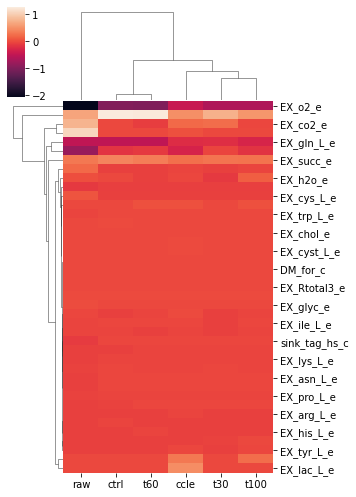

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#fig, ax = plt.subplots(1, 1, figsize=(100,80), dpi=100)
sns.clustermap(finale_df, figsize=(5,7))

In [81]:
finale_df.sort_values(by='ctrl', ascending=False)

,ccle,raw,ctrl,t30,t60,t100
EX_nh4_e,0.494973,0.677295,1.284291e+00,0.783344,1.262135,0.559527
EX_succ_e,0.265119,0.329342,4.254547e-01,0.304770,0.371324,0.294366
EX_acald_e,0.003097,0.000000,1.551787e-02,0.000000,0.000000,0.000000
EX_fum_e,0.009532,0.015169,9.531601e-03,0.009532,0.009532,0.009532
DM_for_c,0.001082,0.000000,1.082484e-03,0.001082,0.001082,0.001082
EX_Rtotal2_e,0.000928,0.000000,9.278132e-04,0.000155,0.000000,0.000928
EX_Rtotal3_e,0.000928,0.000000,9.278132e-04,0.000155,0.000000,0.000928
EX_so4_e,0.047529,0.000000,5.551115e-17,0.000000,0.059900,0.059900
EX_h_e,0.326708,0.000000,0.000000e+00,0.000000,0.000000,0.246312
EX_hdcea_e,0.013144,0.000000,0.000000e+00,0.000000,0.000000,0.000000
